<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# line with noise mmsi=371415000

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.preprocessing import MinMaxScaler
import psycopg2
from random import choice
import contextily as ctx
import numpy as np
from shapely.geometry import Point, LineString, shape
from tqdm import tqdm_notebook

In [2]:
host    = 
db_name = 
uname   = 
pw      = 
port    = 

con = psycopg2.connect(database=db_name, user=uname, password=pw, host=host, port = port)
sql = 'SELECT * FROM ais_data.dynamic_ships WHERE ts>1456889110 AND ts<1456975510  '
df = gpd.GeoDataFrame.from_postgis(sql, con, geom_col='geom' )

con.close()

In [101]:
df.mmsi.nunique()

96

In [102]:
df.groupby(['mmsi'])['id'].count().mean()

1882.0833333333333

In [31]:
sample_ves.geom.distance(point).replace(0,None).min()

3.3499999999797581e-05

In [38]:
max_val = 0
min_val = 1000
for point in sample_ves.geom:
    if (sample_ves.geom.distance(point).max()) > max_val:
        max_val = (sample_ves.geom.distance(point).max())
    if sample_ves.geom.distance(point).replace(0,None).min() < min_val and sample_ves.geom.distance(point).replace(0,None).min() != 0:
        min_val = sample_ves.geom.distance(point).replace(0,None).min()
        


In [39]:
min_val, max_val

(1.4000000000180535e-05, 0.25371053217838824)

In [59]:
clstr(max_val, min_val, 0.01)

71

In [56]:
def clstr(max_len, starting_radius, radius_weight):
    rad_sum = 0
    i = 1
    while True:
        if i == 1:
            cr_rd = starting_radius
        else:
            cr_rd += (i *radius_weight)/100
        if cr_rd >= max_len:
            return i
        i += 1



In [181]:
distances = []
sample_ves.reset_index(drop=True, inplace=True)
for point in tqdm_notebook(sample_ves.geom):
    dist = []
    for i in range(1,n+1):
        thres = interval*1
        dist.append(len(sample_ves.geom.distance(point).loc[sample_ves.geom.distance(point)<thres]))
    distances.append((sample_ves[sample_ves.geom == point].index[0],dist))
            

In [172]:
sample_ves[sample_ves.geom == point].index[0]

141426

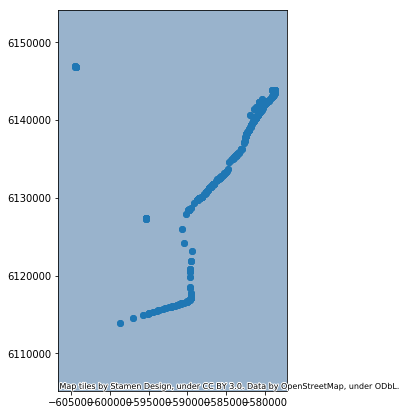

In [3]:
sample_ves = df.loc[df['mmsi'] == 371415000]
sample_ves.crs = {'init': 'epsg:4326'}

ax = sample_ves.to_crs(epsg=3857).plot(figsize=(7, 7))
ctx.add_basemap(ax)

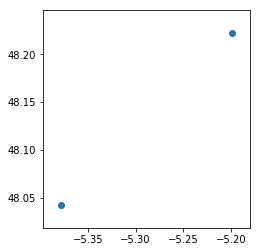

In [160]:
def clasify(geom, n=20):
    max_val = 0
    for point in sample_ves.geom:
        if (sample_ves.geom.distance(point).max()) > max_val:
            max_val = (sample_ves.geom.distance(point).max())
    interval = max_val/n
    


In [139]:
list(tup)[::-1]
   21361 [21361, 36513]

[0, 36513]

In [86]:
scaled_x = scaler.fit_transform(sample_ves.geom.x)
scaled_y = scaler.fit_transform(sample_ves.geom.y)

In [108]:
clst = MeanShift()
clst.fit_predict(scaled_x)

ValueError: Expected n_neighbors > 0. Got 0

In [25]:
sample_ves_sorted = sample_ves.sort_values('id')

In [26]:
tmp_df = sample_ves_sorted.groupby(['mmsi'])['geom'].apply(lambda x: LineString(x.tolist()[:]))

In [27]:
tmp_df = gpd.GeoDataFrame(tmp_df, geometry='geom')


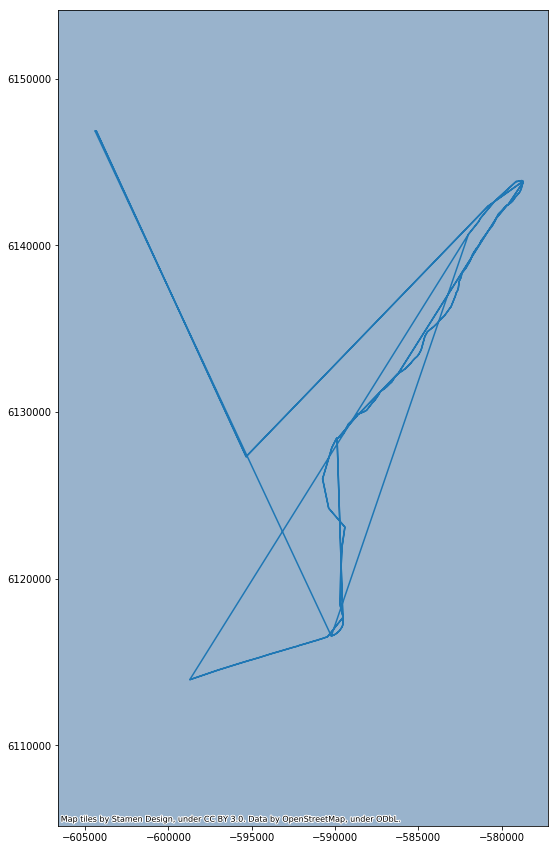

In [28]:
tmp_df.crs = {'init': 'epsg:4326'}

ax = tmp_df.to_crs(epsg=3857).plot(figsize=(15, 15))
ctx.add_basemap(ax)

In [83]:
type(tmp_df.geom.iloc[0])

shapely.geometry.linestring.LineString

              id       mmsi  status   turn  speed  course  heading       lon  \
136189  17552011  228025700     0.0    0.0    8.9   295.5      300 -4.044165   
136285  17552107  228025700     0.0    0.0    8.4   295.5      300 -4.060665   
136295  17552117  228025700     0.0    0.0    8.9   294.5      300 -4.061332   
136298  17552120  228025700     0.0  127.0    8.9   296.6      300 -4.061688   
136416  17552238  228025700     0.0  127.0    8.8   296.6      301 -4.092270   
136479  17552301  228025700     0.0 -126.0    9.0   299.9      300 -4.107165   
136921  17552743  228025700     0.0    0.0    8.2   300.7      301 -4.207773   
136922  17552744  228025700     0.0    0.0    8.2   300.7      301 -4.207933   
136925  17552747  228025700     0.0  127.0    8.4   298.1      302 -4.208332   
136927  17552749  228025700     0.0 -126.0    8.1   296.8      301 -4.208405   
136928  17552750  228025700     0.0    0.0    8.5   302.3      300 -4.208499   
136931  17552753  228025700     0.0    0

RuntimeError: b'latitude or longitude exceeded limits'

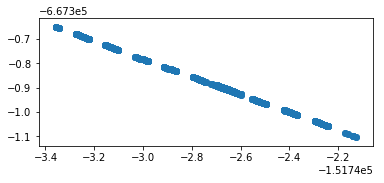

In [31]:
df2plt = df.loc[df['mmsi'] == choice(df.mmsi.unique())]
print(df2plt)
df2plt.plot()


ax = df2plt.to_crs(epsg=3857).plot(figsize=(9, 9))
ctx.add_basemap(ax)

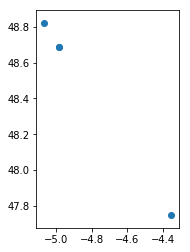

In [280]:
tmp[1:5].plot()

In [281]:
# lb
def get_slope(df):
    dx = df.geometry.x.diff()
    dy = df.geometry.y.diff()
    dx.replace([np.inf, -np.inf,0], np.nan, inplace=True)
    dy.replace([np.inf, -np.inf,0], np.nan, inplace=True)
#     df['Reviewed'] - df['Reviewed'].shift()
    max_x_slope = (dx-dx.shift()).abs().idxmax()
    max_y_slope = (dy-dy.shift()).abs().idxmax()
    return max(max_x_slope, max_y_slope)

In [282]:
get_slope(df2plt)

156226

In [268]:
# df2plt.loc[df2plt['id']>= (poi-10) | df2plt['id']<= (poi+10)]
tmp = df2plt[(df2plt.index >= (get_slope(df2plt)-18000)) & (df2plt.index <=get_slope(df2plt)+55)]

In [283]:
df.geometry.x.diff()

0              NaN
1        -0.001502
2         0.000895
3        -0.000356
4        -0.100018
5         0.100980
6        -0.001502
7         0.000886
8        -0.000337
9        -0.099995
10        0.100948
11        0.149360
12       -0.511995
13        0.362035
14        0.000000
15       -0.000338
16       -0.099989
17        0.100928
18       -0.000617
19       -0.000338
20       -0.099991
21        0.100943
22        0.000000
23       -0.001512
24       -0.358913
25        0.363954
26       -0.004137
27       -0.000325
28        0.000932
29       -0.000621
            ...   
180650    0.100948
180651    0.149360
180652   -0.511995
180653    0.362035
180654    0.000000
180655   -0.000338
180656   -0.099989
180657    0.100928
180658   -0.000617
180659   -0.000338
180660   -0.099991
180661    0.100943
180662    0.000000
180663   -0.001512
180664   -0.358913
180665    0.363954
180666   -0.004137
180667   -0.000325
180668    0.000932
180669   -0.000621
180670   -0.000360
180671   -0.